In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('/content/sample_data/housepricedata.csv')

In [8]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [9]:
dataset=df.values

In [10]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [11]:
x = dataset[:,0:10]
y = dataset[:,10]

In [12]:
from sklearn import preprocessing

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

In [15]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [16]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=0)

In [21]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.3, random_state=0)

In [22]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (306, 10) (132, 10) (1022,) (306,) (132,)


In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
model = Sequential([
Dense(32, activation='relu', input_shape=(10,)),
Dense(32, activation='relu'),
Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',

loss='binary_crossentropy',
metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
batch_size=32, epochs=100,
validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.7005 - accuracy: 0.3679 - val_loss: 0.6941 - val_accuracy: 0.4641
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5108 - val_loss: 0.6860 - val_accuracy: 0.5784
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5607 - val_loss: 0.6784 - val_accuracy: 0.6405
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.6526 - val_loss: 0.6713 - val_accuracy: 0.6667
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6399 - val_loss: 0.6645 - val_accuracy: 0.7026
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.7114 - val_loss: 0.6578 - val_accuracy: 0.7484
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.7202 - val_loss: 0.6512 - val_accuracy: 0.7712
Epoch 8/100
3

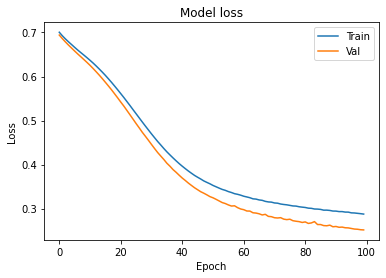

In [25]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

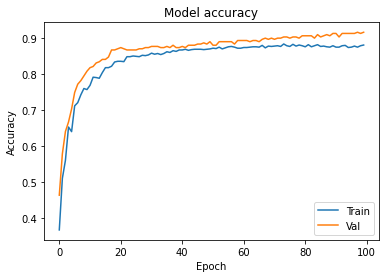

In [26]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [27]:
model_2 = Sequential([
Dense(1000, activation='relu', input_shape=(10,)),
Dense(1000, activation='relu'),
Dense(1000, activation='relu'),
Dense(1000, activation='relu'),
Dense(1, activation='sigmoid'),
])

In [28]:
model_2.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

In [29]:
hist_2 = model_2.fit(X_train, Y_train,
batch_size=32, epochs=100,
validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 46ms/step - loss: 0.4853 - accuracy: 0.7720 - val_loss: 0.3772 - val_accuracy: 0.8399
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3773 - accuracy: 0.8552 - val_loss: 0.4830 - val_accuracy: 0.8268
Epoch 3/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3422 - accuracy: 0.8503 - val_loss: 0.2853 - val_accuracy: 0.8954
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2803 - accuracy: 0.8757 - val_loss: 0.2548 - val_accuracy: 0.9085
Epoch 5/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2809 - accuracy: 0.8787 - val_loss: 0.2465 - val_accuracy: 0.8987
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2421 - accuracy: 0.8894 - val_loss: 0.2294 - val_accuracy: 0.9150
Epoch 7/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3058 - accuracy: 0.8748 - val_loss: 0.2756 - val_accuracy: 0.9020
Epoch 

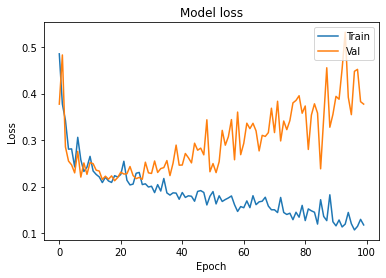

In [30]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

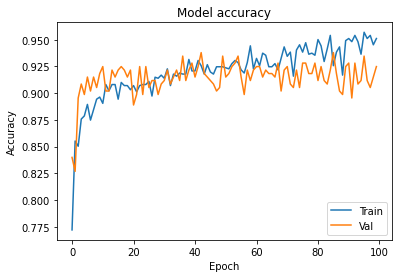

In [31]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [32]:
from keras.layers import Dropout
from keras import regularizers

In [40]:
model_3 = Sequential([
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
Dropout(0.3),
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
Dropout(0.3),
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
Dropout(0.3),
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
Dropout(0.3),
Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
model_3.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

In [38]:
model_3.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy']),

(None,)

In [41]:
hist_3 = model_3.fit(X_train, Y_train,
batch_size=32, epochs=100,
validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 61ms/step - loss: 14.2202 - accuracy: 0.6536 - val_loss: 3.8509 - val_accuracy: 0.8072
Epoch 2/100
32/32 [==============================] - 2s 53ms/step - loss: 1.6736 - accuracy: 0.8278 - val_loss: 0.6439 - val_accuracy: 0.8856
Epoch 3/100
32/32 [==============================] - 2s 49ms/step - loss: 0.6447 - accuracy: 0.8180 - val_loss: 0.5635 - val_accuracy: 0.8627
Epoch 4/100
32/32 [==============================] - 2s 48ms/step - loss: 0.5485 - accuracy: 0.8474 - val_loss: 0.4700 - val_accuracy: 0.8954
Epoch 5/100
32/32 [==============================] - 2s 50ms/step - loss: 0.5215 - accuracy: 0.8523 - val_loss: 0.5034 - val_accuracy: 0.8693
Epoch 6/100
32/32 [==============================] - 2s 51ms/step - loss: 0.4890 - accuracy: 0.8640 - val_loss: 0.4684 - val_accuracy: 0.8758
Epoch 7/100
32/32 [==============================] - 2s 51ms/step - loss: 0.4873 - accuracy: 0.8650 - val_loss: 0.4184 - val_accuracy: 0.9183
Epoch

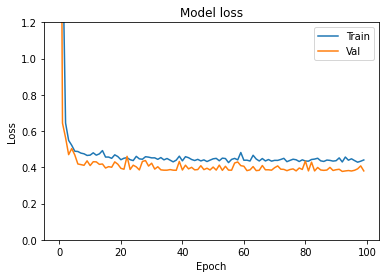

In [42]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

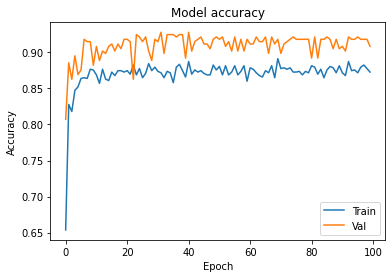

In [43]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()